# Python Real Estate Analysis Project

May 2017

Written by Divya Sasidharan at NYU Stern 

Contact: ds5151@nyu.edu


## Overview

Real estate is an active area in both investment market and academic research. Foreclosure auction properties are special properties that have different transaction and payment procedures from the regular sales, and the home buyers take much higher risk. In this project, we built a scalable analytics workflow to extract, clean and analyze foreclosure property data from multiple sources using Python tools and lib. We analyzed the correlation of foreclosure property price with crime score, walk score and school rating. We have that crime and school is major factor influencing the property price and demand.


In [3]:
import pandas as pd                    # Importing necessary data package
import matplotlib.pyplot as plt        # pyplot module
import numpy as np


## Data Soure 

Downloaded the Philadelphia real estate dataset from Kaggle and import using Pandas lib. Please refer the following link. 

https://www.kaggle.com/harry007/philly-real-estate-data-set-sample/downloads/philly-real-estate-data-set-sample.zip

In [8]:
Zillow = pd.ExcelFile("Properties_philly_Kraggle_v2.xlsx")
zz = Zillow.parse('Properties_philly_Kraggle_v2')
zz

,Address,Zillow Address,Sale Date,Opening Bid,Sale Price/bid price,Book/Writ,OPA,Postal Code,Attorney,Ward,...,School Score,Zillow Estimate,Rent Estimate,taxAssessment,yearBuilt,finished (SqFt),bathrooms,bedrooms,PropType,Average comps
0,2327 E SERGEANT ST,"2327 E SERGEANT ST , Philadelphia, PA 19125",September 13 2016,11400.0,11400.0,1609-412,314095100.0,19125.0,PHELAN HALLINAN LLP,31.0,...,15.87,228663.0,1500.0,174000.0,1921.0,898.0,1,2,SingleFamily,240254.55
1,4466 TOLBUT ST,"4466 TOLBUT ST , Philadelphia, PA 19136",August 2 2016,8500.0,8500.0,1606-339,652092800.0,19136.0,PARKER MCCAY,65.0,...,32.53,141579.0,1200.0,119700.0,1959.0,1120.0,1.5,3,Townhouse,150937.50
2,134 E WALNUT LN,"134 E WALNUT LN , Philadelphia, PA 19144",August 2 2016,12600.0,12600.0,1605-426,592058735.0,19144.0,PHELAN HALLINAN LLP,59.0,...,7.89,186172.0,1500.0,190300.0,2006.0,1882.0,3,3,SingleFamily,225483.33
3,111 W ABBOTTSFORD AVE,"111 W ABBOTTSFORD AVE , Philadelphia, PA 19144",August 2 2016,9200.0,9200.0,1607-317,123016300.0,19144.0,KML LAW GROUP,12.0,...,7.89,168557.0,1400.0,118300.0,1900.0,1792.0,1,4,SingleFamily,135755.56
4,146 E DUVAL ST,"146 E DUVAL ST , Philadelphia, PA 19144",August 2 2016,8900.0,8900.0,1605-510,592159100.0,19144.0,PHELAN HALLINAN LLP,59.0,...,7.89,135045.0,1350.0,113700.0,1925.0,1419.0,2,3,SingleFamily,144120.00
5,1131 HELLERMAN ST,"1131 HELLERMAN ST , Philadelphia, PA 19111",September 13 2016,8800.0,8800.0,1602-643,531129700.0,19111.0,PHELAN HALLINAN LLP,53.0,...,23.84,133871.0,1200.0,120100.0,1947.0,1260.0,1.5,3,Townhouse,126000.00
6,313 SALAIGNAC ST,"313 SALAIGNAC ST , Philadelphia, PA 19128",September 13 2016,10900.0,10900.0,1609-568,212002100.0,19128.0,KML LAW GROUP,21.0,...,38.33,192442.0,1350.0,55500.0,1955.0,896.0,1,2,Townhouse,215612.50
7,4408 SHERWOOD RD,"4408 SHERWOOD RD , Philadelphia, PA 19131",October 4 2016,10000.0,10000.0,1610-357,521194100.0,19131.0,PHELAN HALLINAN LLP,52.0,...,8.34,155873.0,1500.0,114800.0,1925.0,1354.0,1,3,SingleFamily,145408.13
8,3545 TUDOR ST,"3545 TUDOR ST , Philadelphia, PA 19136",September 13 2016,10800.0,10800.0,1609-627,642138100.0,19136.0,DUANE MORRIS LLP,64.0,...,32.53,142309.0,1150.0,136200.0,1963.0,1616.0,1,4,Townhouse,127921.43
9,7034 WHEELER ST,"7034 WHEELER ST , Philadelphia, PA 19142",October 4 2016,7100.0,7100.0,1610-520,406204700.0,19142.0,MILSTEAD & ASSOCIATES LLC,40.0,...,7.28,96713.0,1050.0,70500.0,1925.0,992.0,1,3,Condominium,95016.13


In [9]:
print('Dimensions: ', zz.shape)  # looking at the categories I can work with

Dimensions:  (805, 30)


In [10]:
print('Column labels: ', zz.columns)   #Listing out the Column headings

Column labels:  Index(['Address', 'Zillow Address', 'Sale Date', 'Opening Bid',
       'Sale Price/bid price', 'Book/Writ', 'OPA', 'Postal Code', 'Attorney',
       'Ward', 'Seller', 'Buyer', 'Sheriff Cost', 'Advertising', 'Other',
       'Record Deed', 'Water', 'PGW', ' Avg Walk&Transit score  ',
       ' Violent Crime Rate ', ' School Score  ', 'Zillow Estimate',
       'Rent Estimate', 'taxAssessment', 'yearBuilt', 'finished \n(SqFt)',
       ' bathrooms ', ' bedrooms ', 'PropType', 'Average comps'],
      dtype='object')


In [11]:
print('Row labels: ', zz.index)

Row labels:  RangeIndex(start=0, stop=805, step=1)


In [12]:
z = zz.dropna()       #Dropped empty rows that does have any data
print('Dimensions: ', z.shape)

Dimensions:  (610, 30)



## Crime rate, Walks and School score in each postal code   

Following are the observation based on analyzing average House price by Crime rate, walkscore and school score against postal code. The data that affected the price change most was crime for the city of Philadelphia. School rating also influenced the price of the property. Walkscore did not have a strong impact it was overridden by crime score but it had combined effect at the city center.


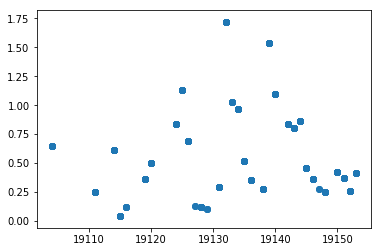

In [13]:
plt.scatter(z['Postal Code'], z[' Violent Crime Rate '])
plt.show()

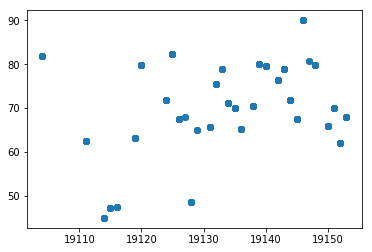

In [14]:
plt.scatter(z['Postal Code'], z[' Avg Walk&Transit score  '])
plt.show()

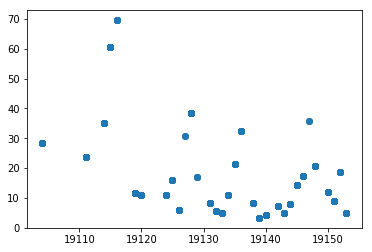

In [44]:
plt.scatter(z['Postal Code'], z[' School Score  '])
plt.show()


## House sales price by zipcode   

Below analyis shows that most of the house price are below $150,000 in the city of Philadelphia. 


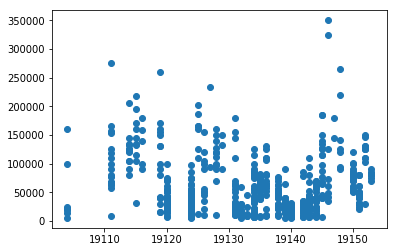

In [45]:
plt.scatter(z['Postal Code'], z['Sale Price/bid price'])
plt.show()

In [46]:
z1 = pd.DataFrame(z, columns = ['Address',
 'Zillow Address',
 'Sale Date',
 'Opening Bid',
 'Sale Price/bid price',
 'Book/Writ',
 'OPA',
 'Postal Code',
 'Attorney',
 'Ward',
 'Seller',
 'Buyer',
 'Sheriff Cost',
 'Advertising',
 'Other',
 'Record Deed',
 'Water',
 'PGW',
 ' Avg Walk&Transit score  ',
 ' Violent Crime Rate ',
 ' School Score  ',
 'Zillow Estimate',
 'Rent Estimate',
 'taxAssessment',
 'yearBuilt',
 'finished \n(SqFt)',
 ' bathrooms ',
 ' bedrooms ',
 'PropType',
 'Average comps'])


## Calculating Average price of the property 

Average price of the property = Zillow Estimate + Tax asssesment value + Average comps of similar property


In [47]:
z1['Avg. Price'] = z1[['Zillow Estimate', 'taxAssessment', 'Average comps']].mean(axis=1)

In [48]:
list(z1)

['Address',
 'Zillow Address',
 'Sale Date',
 'Opening Bid',
 'Sale Price/bid price',
 'Book/Writ',
 'OPA',
 'Postal Code',
 'Attorney',
 'Ward',
 'Seller',
 'Buyer',
 'Sheriff Cost',
 'Advertising',
 'Other',
 'Record Deed',
 'Water',
 'PGW',
 ' Avg Walk&Transit score  ',
 ' Violent Crime Rate ',
 ' School Score  ',
 'Zillow Estimate',
 'Rent Estimate',
 'taxAssessment',
 'yearBuilt',
 'finished \n(SqFt)',
 ' bathrooms ',
 ' bedrooms ',
 'PropType',
 'Average comps',
 'Avg. Price']

In [49]:
z1['Avg. Price'].head()

0    214305.850000
1    137405.500000
2    200651.776667
3    140870.853333
4    130955.000000
Name: Avg. Price, dtype: float64


## Average Price per sq. ft   

Average price per sq.ft = Average price/finished square foot. 


In [50]:
z1['Avg. price per sq. ft'] = z1['Avg. Price']/z1['finished \n(SqFt)']

In [51]:
z1['Avg. price per sq. ft'].head()

0    238.647940
1    122.683482
2    106.616247
3     78.610967
4     92.286822
Name: Avg. price per sq. ft, dtype: float64


## Calculating rank based on Crime rate   

Crime rate has been biffercated into various buckets based on the min, median and max. Please refer the below code for the buckets allocated. 

In [52]:
z1[' Violent Crime Rate '].median()


0.61

In [53]:
z1[' Violent Crime Rate '].min()


0.040000000000000001

In [54]:
z1[' Violent Crime Rate '].max()

1.72

In [55]:
crimerank = []

for row in z1[' Violent Crime Rate ']:
 if row<0.344:    
  crimerank.append(1)
 elif row>=0.344 and row<0.688:
  crimerank.append(2)
 elif row>=0.688 and row<1.032:
  crimerank.append(3)
 elif row>=1.032 and row<1.376:
  crimerank.append(4)
 else:
  crimerank.append(5)
      
z1['Crime Rank'] = crimerank

In [56]:
z1['Crime Rank'].head()

0    4
1    2
2    3
3    3
4    3
Name: Crime Rank, dtype: int64

In [57]:
zcrime = z1.groupby(['Crime Rank'])['Avg. Price'].mean()
zcrime

Crime Rank
1    161507.251140
2    129215.618003
3     88066.210432
4     89100.363958
5     56334.660486
Name: Avg. Price, dtype: float64


## Impact of Crime over sales price   

There are several factors that influences the house value and the most important is the crime for the city of Philadelphia. The same factor may not be the most influential factor in other cities for example, Manhattan, NY. The following chart shows that higher the rank (lower crime) higher the price of the property. 

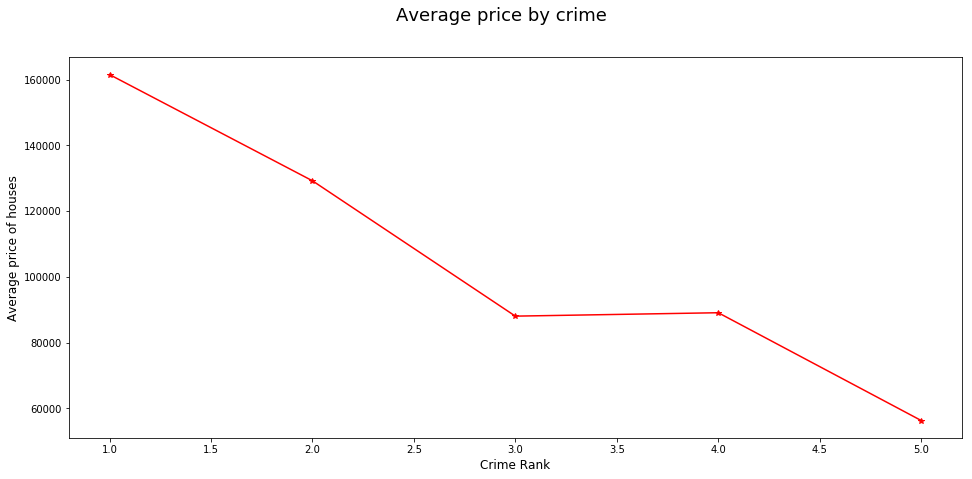

In [58]:
plt.figure(figsize = (16,7))  # plotting our data
plt.plot(zcrime, color = 'red', marker= '*')
plt.suptitle('Average price by crime', fontsize=18)
plt.xlabel('Crime Rank', fontsize=12)
plt.ylabel('Average price of houses', fontsize=12)
plt.show()


## Calculating rank based on Walk score

Walkscore has been biffercated into various buckets based on the min, median and max. Please refer the below code for the buckets allocated. 

In [59]:
Walkrank = []

for row in z1[' Avg Walk&Transit score  ']:
 if row>88:    
  Walkrank.append(1)
 elif row>77 and row<=88:
  Walkrank.append(2)
 elif row>66 and row<=77:
  Walkrank.append(3)
 elif row>55 and row<=66:
  Walkrank.append(4)
 else:
  Walkrank.append(5)
      
z1['Walk Rank'] = Walkrank

In [60]:
z1['Walk Rank'].head()

0    2
1    4
2    3
3    3
4    3
Name: Walk Rank, dtype: int64

In [61]:
zwalk = z1.groupby(['Walk Rank'])['Avg. Price'].mean()
zwalk

Walk Rank
1    176228.492500
2     82401.484032
3     99396.604576
4    155027.196575
5    213685.544103
Name: Avg. Price, dtype: float64

## Impact of Walkscore over sales price

Philadelphia has the 6th best walkscore after New York, Jersey City, San Francisco, Boston and Newark. Analysis carried out by John I. Gilderbloom, William W. Riggs and Wesley L. Meares shows that walkability has a positive impact not only on neighborhood housing valuation but also on reduction of crime and foreclosure[8]. Our research analysis of Philadelphia did not find strong correlation between Walkscore and property price except in the city center.

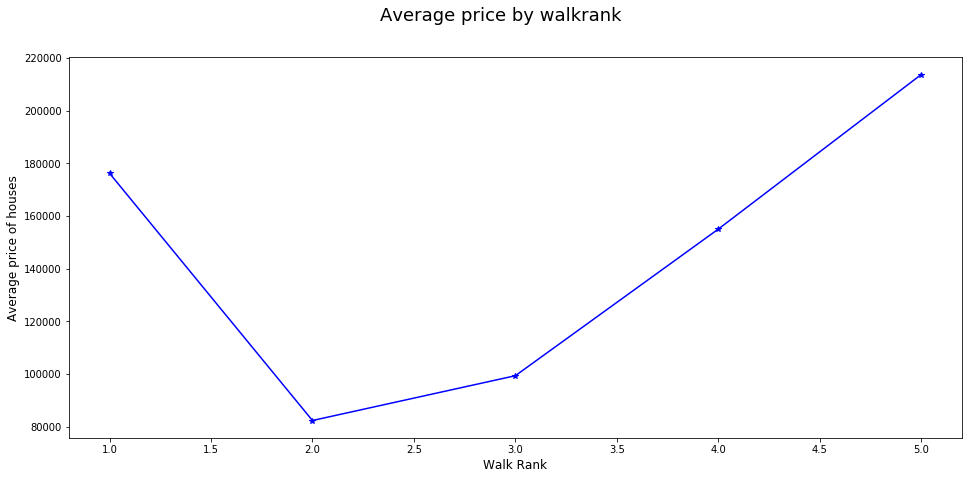

In [62]:
plt.figure(figsize = (16,7))  # plotting our data
plt.plot(zwalk, color = 'blue', marker= '*')
plt.suptitle('Average price by walkrank', fontsize=18)
plt.xlabel('Walk Rank', fontsize=12)
plt.ylabel('Average price of houses', fontsize=12)
plt.show()

## Calculating rank based on School rating

School ratings has been biffercated into various buckets based on the min, median and max. Please refer the below code for the buckets allocated. 

In [63]:
Schoolrank = []

for row in z1[' School Score  ']:
 if row>57.308:    
  Schoolrank.append(1)
 elif row>43.816 and row<=57.308:
  Schoolrank.append(2)
 elif row>30.324 and row<=43.816:
  Schoolrank.append(3)
 elif row>16.832 and row<=30.324:
  Schoolrank.append(4)
 else:
  Schoolrank.append(5)
      
z1['School Rank'] = Schoolrank

In [64]:
zschool = z1.groupby(['School Rank'])['Avg. Price'].mean()
zschool

School Rank
1    228608.638444
3    177007.963475
4    141418.626831
5     97914.323983
Name: Avg. Price, dtype: float64

## Impact of School score over sales price

School rating is also influenced the price of the property. Better school score also improves the demand of the property.

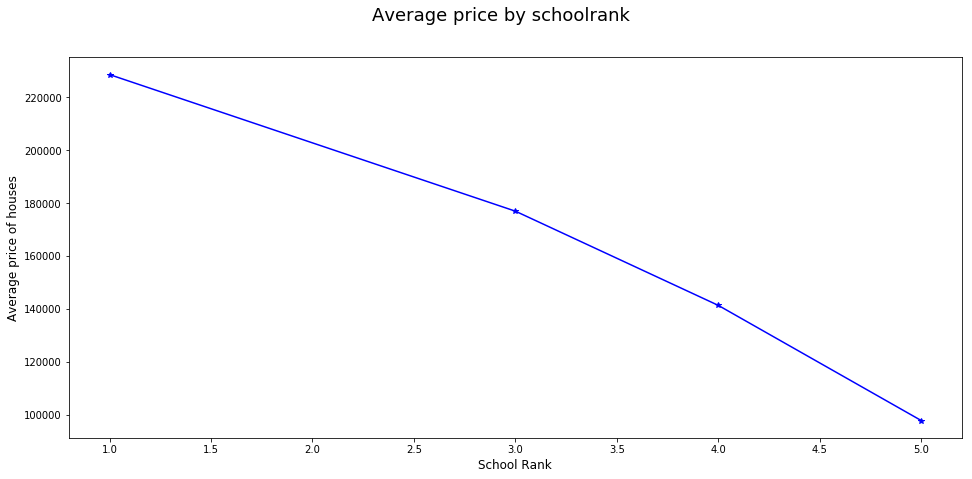

In [65]:
plt.figure(figsize = (16,7))  # plotting our data
plt.plot(zschool, color = 'blue', marker= '*')
plt.suptitle('Average price by schoolrank', fontsize=18)
plt.xlabel('School Rank', fontsize=12)
plt.ylabel('Average price of houses', fontsize=12)
plt.show()

In [66]:
z1.head()

,Address,Zillow Address,Sale Date,Opening Bid,Sale Price/bid price,Book/Writ,OPA,Postal Code,Attorney,Ward,...,finished (SqFt),bathrooms,bedrooms,PropType,Average comps,Avg. Price,Avg. price per sq. ft,Crime Rank,Walk Rank,School Rank
0,2327 E SERGEANT ST,"2327 E SERGEANT ST , Philadelphia, PA 19125",September 13 2016,11400.0,11400.0,1609-412,314095100.0,19125.0,PHELAN HALLINAN LLP,31.0,...,898.0,1,2,SingleFamily,240254.55,214305.850000,238.647940,4,2,5
1,4466 TOLBUT ST,"4466 TOLBUT ST , Philadelphia, PA 19136",August 2 2016,8500.0,8500.0,1606-339,652092800.0,19136.0,PARKER MCCAY,65.0,...,1120.0,1.5,3,Townhouse,150937.50,137405.500000,122.683482,2,4,3
2,134 E WALNUT LN,"134 E WALNUT LN , Philadelphia, PA 19144",August 2 2016,12600.0,12600.0,1605-426,592058735.0,19144.0,PHELAN HALLINAN LLP,59.0,...,1882.0,3,3,SingleFamily,225483.33,200651.776667,106.616247,3,3,5
3,111 W ABBOTTSFORD AVE,"111 W ABBOTTSFORD AVE , Philadelphia, PA 19144",August 2 2016,9200.0,9200.0,1607-317,123016300.0,19144.0,KML LAW GROUP,12.0,...,1792.0,1,4,SingleFamily,135755.56,140870.853333,78.610967,3,3,5
4,146 E DUVAL ST,"146 E DUVAL ST , Philadelphia, PA 19144",August 2 2016,8900.0,8900.0,1605-510,592159100.0,19144.0,PHELAN HALLINAN LLP,59.0,...,1419.0,2,3,SingleFamily,144120.00,130955.000000,92.286822,3,3,5


z1['Avg. price per sq. ft'] = z1['Avg. Price']/z1['finished \n(SqFt)']

In [69]:
z1['Closing Cost'] = z1['Avg. Price']*.085


In [70]:
 z1['Rehab Cost'] = z1['finished \n(SqFt)']*25


In [71]:
 z1['Estimated Max Bid Price']= z1['Avg. Price']-z1['Rehab Cost']


In [72]:
 z1.head()

,Address,Zillow Address,Sale Date,Opening Bid,Sale Price/bid price,Book/Writ,OPA,Postal Code,Attorney,Ward,...,PropType,Average comps,Avg. Price,Avg. price per sq. ft,Crime Rank,Walk Rank,School Rank,Closing Cost,Rehab Cost,Estimated Max Bid Price
0,2327 E SERGEANT ST,"2327 E SERGEANT ST , Philadelphia, PA 19125",September 13 2016,11400.0,11400.0,1609-412,314095100.0,19125.0,PHELAN HALLINAN LLP,31.0,...,SingleFamily,240254.55,214305.850000,238.647940,4,2,5,18215.997250,22450.0,191855.850000
1,4466 TOLBUT ST,"4466 TOLBUT ST , Philadelphia, PA 19136",August 2 2016,8500.0,8500.0,1606-339,652092800.0,19136.0,PARKER MCCAY,65.0,...,Townhouse,150937.50,137405.500000,122.683482,2,4,3,11679.467500,28000.0,109405.500000
2,134 E WALNUT LN,"134 E WALNUT LN , Philadelphia, PA 19144",August 2 2016,12600.0,12600.0,1605-426,592058735.0,19144.0,PHELAN HALLINAN LLP,59.0,...,SingleFamily,225483.33,200651.776667,106.616247,3,3,5,17055.401017,47050.0,153601.776667
3,111 W ABBOTTSFORD AVE,"111 W ABBOTTSFORD AVE , Philadelphia, PA 19144",August 2 2016,9200.0,9200.0,1607-317,123016300.0,19144.0,KML LAW GROUP,12.0,...,SingleFamily,135755.56,140870.853333,78.610967,3,3,5,11974.022533,44800.0,96070.853333
4,146 E DUVAL ST,"146 E DUVAL ST , Philadelphia, PA 19144",August 2 2016,8900.0,8900.0,1605-510,592159100.0,19144.0,PHELAN HALLINAN LLP,59.0,...,SingleFamily,144120.00,130955.000000,92.286822,3,3,5,11131.175000,35475.0,95480.000000


## Conclusion

Based on the analysis founding we used crime as our core factor to eliminate properties that are not good for investment. By only taking properties in the range below the crime median. Then making an assumption that all property needs rehab. including the average tax, closing and rehab cost we came up with a safe ceiling bid price, which we compared with the actual sales price. Most of them were below the ceiling price. Note ceiling price can be adjusted based on the percentage of profit required, if it’s an investment property